## Solving Rental Listing Inquiries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Reference for customizing plots : http://matplotlib.org/users/customizing.html
# print(plt.style.available)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Kaggle dataset: 
# https://www.kaggle.com/c/two-sigma-connect-rental-listing-inquiries/data

### Loading the dataset provided
df_train = pd.read_json('../../random/data/rental_listing/train.json')
df_test = pd.read_json('../../random/data/rental_listing/test.json')

In [3]:
df_train.head()

bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   

                                              description  \
10      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000                                                       
100004  Top Top West Village location, beautiful Pre-w...   
100007  Building Amenities - Garage - Garden - fitness...   
100013  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street   
100007     East 49th Street   
100013    West 143rd Street   

                                                 features  latitude  \
10                                                     []   40.7145   
10000   [Doorman, Elevator, Fitness Center, Cats Allow...   40.7947   
100004  [Laundry In Building, Dishwasher, Hardwood Flo...   40.7388   
100007                          [Hardwood Floors, No Fee]   40.7539   
100013                                          [Pre-War]   40.8241   

        listing_id  longitude                        manager_id  \
10         7211212   -73.9425  5ba989232d0489da1b5f2c45f6688adc   
10000      7150865   -73.9667  7533621a882f71e25173b27e3139d83d   
100004     6887163   -74.0018  d9039c43983f6e564b1482b273bd7b01   
100007     6888711   -73.9677  1067e078446a7897d2da493d2f741316   
100013     6934781   -73.9493  98e13ad4b495b9613cef886d79a6291f   

                                                   photos  price  \
10      [https://photos.renthop.com/2/7211212_1ed4542e...   3000   
10000   [https://photos.renthop.com/2/7150865_be3306c5...   5465   
100004  [https://photos.renthop.com/2/6887163_de85c427...   2850   
100007  [https://photos.renthop.com/2/6888711_6e660cee...   3275   
100013  [https://photos.renthop.com/2/6934781_1fa4b41a...   3350   

                 street_address interest_level  
10      792 Metropolitan Avenue         medium  
10000       808 Columbus Avenue            low  
100004          241 W 13 Street           high  
100007     333 East 49th Street            low  
100013    500 West 143rd Street            low

In [4]:
# Train
df_train["no_photos"] = df_train["photos"].apply(len)
df_train["no_features"] = df_train["features"].apply(len)
df_train["created_transformed"] = pd.to_datetime(df_train["created"])
df_train["created_yr"] = df_train["created_transformed"].dt.year
df_train["created_day"] = df_train["created_transformed"].dt.day
df_train["created_month"] = df_train["created_transformed"].dt.month
df_train['created_month_YrMnth'] = 100*df_train["created_yr"] + df_train["created_month"]


# Test
df_test["no_photos"] = df_test["photos"].apply(len)
df_test["no_features"] = df_test["features"].apply(len)
df_test["created_transformed"] = pd.to_datetime(df_test["created"])
df_test["created_yr"] = df_test["created_transformed"].dt.year
df_test["created_day"] = df_test["created_transformed"].dt.day
df_test["created_month"] = df_test["created_transformed"].dt.month
df_test['created_month_YrMnth'] = 100*df_test["created_yr"] + df_test["created_month"]

print("Number of rows in Train: {}".format(df_train.shape))
print("Number of rows in Test: {}".format(df_test.shape))

Number of rows in Train: (49352, 22)
Number of rows in Test: (74659, 21)


In [5]:
df_train.head()

bathrooms  bedrooms                       building_id  \
10            1.5         3  53a5b119ba8f7b61d4e010512e0dfc85   
10000         1.0         2  c5c8a357cba207596b04d1afd1e4f130   
100004        1.0         1  c3ba40552e2120b0acfc3cb5730bb2aa   
100007        1.0         1  28d9ad350afeaab8027513a3e52ac8d5   
100013        1.0         4                                 0   

                    created  \
10      2016-06-24 07:54:24   
10000   2016-06-12 12:19:27   
100004  2016-04-17 03:26:41   
100007  2016-04-18 02:22:02   
100013  2016-04-28 01:32:41   

                                              description  \
10      A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...   
10000                                                       
100004  Top Top West Village location, beautiful Pre-w...   
100007  Building Amenities - Garage - Garden - fitness...   
100013  Beautifully renovated 3 bedroom flex 4 bedroom...   

            display_address  \
10      Metropolitan Avenue   
10000       Columbus Avenue   
100004          W 13 Street   
100007     East 49th Street   
100013    West 143rd Street   

                                                 features  latitude  \
10                                                     []   40.7145   
10000   [Doorman, Elevator, Fitness Center, Cats Allow...   40.7947   
100004  [Laundry In Building, Dishwasher, Hardwood Flo...   40.7388   
100007                          [Hardwood Floors, No Fee]   40.7539   
100013                                          [Pre-War]   40.8241   

        listing_id  longitude          ...          price  \
10         7211212   -73.9425          ...           3000   
10000      7150865   -73.9667          ...           5465   
100004     6887163   -74.0018          ...           2850   
100007     6888711   -73.9677          ...           3275   
100013     6934781   -73.9493          ...           3350   

                 street_address  interest_level no_photos no_features  \
10      792 Metropolitan Avenue          medium         5           0   
10000       808 Columbus Avenue             low        11           5   
100004          241 W 13 Street            high         8           4   
100007     333 East 49th Street             low         3           2   
100013    500 West 143rd Street             low         3           1   

        created_transformed  created_yr created_day  created_month  \
10      2016-06-24 07:54:24        2016          24              6   
10000   2016-06-12 12:19:27        2016          12              6   
100004  2016-04-17 03:26:41        2016          17              4   
100007  2016-04-18 02:22:02        2016          18              4   
100013  2016-04-28 01:32:41        2016          28              4   

        created_month_YrMnth  
10                    201606  
10000                 201606  
100004                201604  
100007                201604  
100013                201604  

[5 rows x 22 columns]

In [6]:
df_train.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level',
       'no_photos', 'no_features', 'created_transformed', 'created_yr',
       'created_day', 'created_month', 'created_month_YrMnth'],
      dtype='object')

In [7]:
np.unique(df_train['interest_level'])

array(['high', 'low', 'medium'], dtype=object)

In [8]:
# Starting with numerical features first
features_considered = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 
                       'no_photos', 'no_features', 'created_yr', 'created_day', 'created_month', 
                       'created_month_YrMnth']

In [9]:
X = df_train[features_considered]
# Converting 'str' class labels to numeric labels
y = df_train['interest_level'].astype('category').cat.codes
print("Converted Labels: {}".format(np.unique(y)))

Converted Labels: [0 1 2]


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.30, random_state=42)

In [11]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=8, n_estimators=500, learning_rate=0.1, n_jobs=-1).fit(X_train, y_train)

In [12]:
y_hat_train = gbm.predict(X_train)
y_hat_val = gbm.predict(X_val)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Evaluation

In [13]:
from sklearn.metrics import classification_report

print("\n--------Train dataset classification report----------\n")
target_names = ['high', 'low', 'medium']
print(classification_report(y_train, y_hat_train, target_names=target_names))

print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val, target_names=target_names))


--------Train dataset classification report----------

             precision    recall  f1-score   support

       high       0.98      0.85      0.91      2687
        low       0.92      0.99      0.95     23999
     medium       0.93      0.76      0.84      7860

avg / total       0.93      0.92      0.92     34546


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

       high       0.49      0.26      0.34      1152
        low       0.79      0.90      0.84     10285
     medium       0.45      0.33      0.38      3369

avg / total       0.69      0.72      0.70     14806



## Using Skater to understand decision policies

In [14]:
from skater.core.explanations import Interpretation
#from skater.core.global_interpretation.tree_surrogate import TreeSurrogate
from skater.util.dataops import show_in_notebook
from skater.util.logger import _INFO

interpreter = Interpretation(X_train, feature_names=features_considered)
# Using the interpreter instance invoke call to the TreeSurrogate
surrogate_explainer = interpreter.tree_surrogate(estimator_type='classifier', class_weight="balanced",
                                                 feature_names=features_considered, 
                                                 class_names=['0', '1', '2'], seed=42, log_level=_INFO)

In [15]:
surrogate_explainer.learn(X_train, y_hat_train, oracle_y=y_train, prune=None)

2018-09-04 08:10:37,970 - skater.core.global_interpretation.tree_surrogate - INFO - No pruning applied ...
2018-09-04 08:10:38,182 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-04 08:10:38,183 - skater.model.base - WARNING - No examples provided, cannot infer model type
2018-09-04 08:10:38,196 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring ...
2018-09-04 08:10:38,197 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.0782287041937545 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lower is the fidelity/faithfulness of the surrogate model


0.0782287041937545

In [16]:
y_hat = surrogate_explainer.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_val, y_hat, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.31      0.26      0.28      1152
    class 1       0.78      0.84      0.81     10285
    class 2       0.38      0.30      0.34      3369

avg / total       0.65      0.67      0.66     14806



In [18]:
%matplotlib inline
surrogate_explainer.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_no_prune.png', show_img=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.065503 to fit



2018-09-03 20:07:58,829 - skater.util.dataops - INFO - File Name: surrogate_tree_rental_no_prune.png


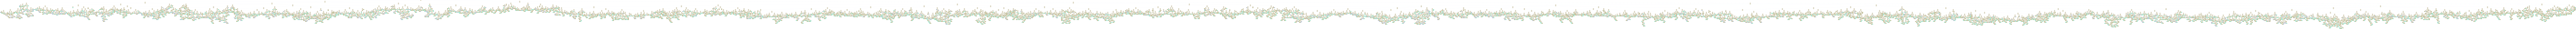

In [19]:
show_in_notebook('surrogate_tree_rental_no_prune.png', width=400, height=400)

In [22]:
# params = {"criterion": ['gini', 'entropy'], "min_samples_leaf": [2, 4],
# "max_leaf_nodes": [2, 4, 6, 8, 10], "max_depth": [4, 6, 10, 14, 18]
# }

surrogate_explainer.learn(X_train, y_hat_train, oracle_y=y_train, prune='pre')

2018-09-03 20:12:41,536 - skater.core.global_interpretation.tree_surrogate - INFO - pre pruning applied ...
2018-09-03 20:12:43,712 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-03 20:12:43,713 - skater.model.base - WARNING - No examples provided, cannot infer model type
2018-09-03 20:12:43,725 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring ...
2018-09-03 20:12:43,726 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.2658428572217505 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lower is the fidelity/faithfulness of the surrogate model


0.2658428572217505

In [21]:
surrogate_explainer.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_pruned.png', show_img=False)

2018-09-03 17:44:36,625 - skater.util.dataops - INFO - File Name: surrogate_tree_rental_pruned.png


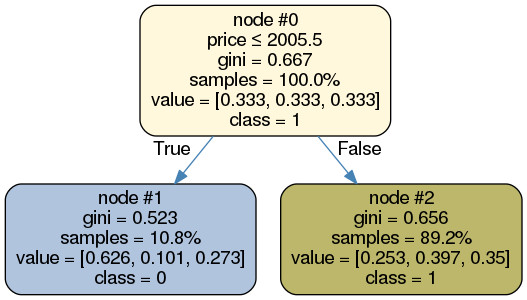

In [20]:
show_in_notebook('surrogate_tree_rental_pruned.png', width=400, height=400)

In [21]:
y_hat_val = surrogate_explainer.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.25      0.34      0.29      1152
    class 1       0.73      0.93      0.82     10285
    class 2       0.00      0.00      0.00      3369

avg / total       0.52      0.68      0.59     14806



In [17]:
surrogate_explainer2 = interpreter.tree_surrogate(estimator_type='classifier', class_weight="balanced",
                                                 feature_names=features_considered, 
                                                 class_names=['0', '1', '2'], seed=42, log_level=_INFO)
surrogate_explainer2.learn(X_train, y_hat_train, oracle_y=y_train, prune=None)

2018-09-04 08:10:38,222 - skater.core.global_interpretation.tree_surrogate - INFO - No pruning applied ...
2018-09-04 08:10:38,434 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (34546,)
2018-09-04 08:10:38,435 - skater.model.base - WARNING - No examples provided, cannot infer model type
2018-09-04 08:10:38,448 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring ...
2018-09-04 08:10:38,449 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.0782287041937545 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lower is the fidelity/faithfulness of the surrogate model


0.0782287041937545

In [18]:
before = surrogate_explainer2.estimator.tree_.children_left
print(surrogate_explainer2.estimator.tree_.max_depth)

31


In [19]:
y_hat_val2 = surrogate_explainer2.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val2, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.31      0.26      0.28      1152
    class 1       0.78      0.84      0.81     10285
    class 2       0.38      0.30      0.34      3369

avg / total       0.65      0.67      0.66     14806



In [20]:
#surrogate_explainer2._post_pruning(surrogate_explainer2.estimator, X_train, y_hat_train, 'default', 0.01)

In [33]:
#after = surrogate_explainer2.estimator.tree_.children_left
a = [0, 1]
b = [0, 1]
[i for i, j in zip(a, b) if i != j]

[]

In [21]:
surrogate_explainer2.learn(X_train, y_hat_train, oracle_y=y_train, prune='post')

2018-09-04 08:10:38,484 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2018-09-04 08:10:38,690 - skater.core.global_interpretation.tree_surrogate - INFO - Unique Labels in ground truth provided [0 1 2]
2018-09-04 08:10:38,691 - skater.core.global_interpretation.tree_surrogate - INFO - Unique Labels in predictions generated [0 1 2]
2018-09-04 08:10:38,692 - skater.model.base - WARNING - No examples provided, cannot infer model type
2018-09-04 08:10:38,693 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used <function F1._score at 0x7f238e2dbf28>
2018-09-04 08:10:38,699 - skater.core.global_interpretation.tree_surrogate - INFO - current score 1.0
2018-09-04 08:10:38,706 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.6371129792478734
2018-09-04 08:10:38,718 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9315773837860127
2018-09-04 08:10:38,731 - skater.core.global_i

2018-09-04 08:10:39,547 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9968206252512848
2018-09-04 08:10:39,560 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9968206252512848
2018-09-04 08:10:39,574 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9968206252512848
2018-09-04 08:10:39,587 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9968206252512848
2018-09-04 08:10:39,600 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9968206252512848
2018-09-04 08:10:39,613 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9968206252512848
2018-09-04 08:10:39,627 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9968206252512848
2018-09-04 08:10:39,640 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9968206252512848
2018-09-04 08:10:39,653 

2018-09-04 08:10:40,462 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:40,476 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:40,490 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:40,503 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:40,517 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:40,531 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:40,545 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:40,558 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:40,572 

2018-09-04 08:10:41,386 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:41,400 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:41,414 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:41,427 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:41,441 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:41,454 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:41,468 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:41,482 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9901322742030805
2018-09-04 08:10:41,496 

2018-09-04 08:10:42,301 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894083993457368
2018-09-04 08:10:42,315 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:10:42,329 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989516998177677
2018-09-04 08:10:42,343 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:10:42,356 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:10:42,370 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:42,384 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:42,397 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:10:42,411 -

2018-09-04 08:10:43,218 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:10:43,231 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:43,245 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890023843941553
2018-09-04 08:10:43,258 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890567899235735
2018-09-04 08:10:43,272 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892846675193888
2018-09-04 08:10:43,286 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:10:43,300 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:43,313 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:43,327 

2018-09-04 08:10:44,136 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:10:44,149 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:10:44,163 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:10:44,176 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9880671294868194
2018-09-04 08:10:44,189 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9880958823636375
2018-09-04 08:10:44,203 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:10:44,216 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:10:44,229 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9884435842663115
2018-09-04 08:10:44,243 

2018-09-04 08:10:45,055 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:45,069 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:10:45,082 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:45,096 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:45,109 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:45,122 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:45,135 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:10:45,149 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:45,162 

2018-09-04 08:10:45,974 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893001126392438
2018-09-04 08:10:45,987 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:46,001 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893543680482328
2018-09-04 08:10:46,014 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893816219318571
2018-09-04 08:10:46,027 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894086403385057
2018-09-04 08:10:46,041 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894086403385057
2018-09-04 08:10:46,054 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:10:46,067 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893003542499959
2018-09-04 08:10:46,081 -

2018-09-04 08:10:46,893 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:10:46,907 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:10:46,921 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:10:46,934 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:46,947 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:10:46,961 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:46,974 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891916523684041
2018-09-04 08:10:46,988 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989245874087351
2018-09-04 08:10:47,001 -

2018-09-04 08:10:47,813 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9860167034353221
2018-09-04 08:10:47,826 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9880029848751166
2018-09-04 08:10:47,840 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893003542499959
2018-09-04 08:10:47,853 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:10:47,867 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:47,880 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894624481664187
2018-09-04 08:10:47,893 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9885899633451063
2018-09-04 08:10:47,907 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:10:47,920 

2018-09-04 08:10:48,730 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:48,743 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:10:48,756 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:48,770 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:10:48,783 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887582196175936
2018-09-04 08:10:48,796 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988839748477739
2018-09-04 08:10:48,810 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891102263323801
2018-09-04 08:10:48,823 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892733539056403
2018-09-04 08:10:48,836 -

2018-09-04 08:10:49,647 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:49,661 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:10:49,675 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:10:49,688 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9883276568854787
2018-09-04 08:10:49,702 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988356424181021
2018-09-04 08:10:49,716 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:49,729 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:10:49,743 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889073608793387
2018-09-04 08:10:49,756 -

2018-09-04 08:10:50,569 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893138961684482
2018-09-04 08:10:50,582 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:10:50,596 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:10:50,609 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9871135071568797
2018-09-04 08:10:50,622 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890830077960268
2018-09-04 08:10:50,636 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:50,649 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:50,663 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892733539056403
2018-09-04 08:10:50,676 -

2018-09-04 08:10:51,484 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:51,498 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:10:51,511 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:51,525 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:51,539 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9862496918811535
2018-09-04 08:10:51,553 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9871446989466012
2018-09-04 08:10:51,566 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887346150479432
2018-09-04 08:10:51,580 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892453786665278
2018-09-04 08:10:51,593 

2018-09-04 08:10:52,405 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894351771084581
2018-09-04 08:10:52,419 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894351771084581
2018-09-04 08:10:52,432 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:10:52,446 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988617318678949
2018-09-04 08:10:52,460 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889073608793387
2018-09-04 08:10:52,474 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889653895044117
2018-09-04 08:10:52,488 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989081466975511
2018-09-04 08:10:52,502 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893137029276011
2018-09-04 08:10:52,515 - 

2018-09-04 08:10:53,322 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:53,335 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894626902970779
2018-09-04 08:10:53,349 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:53,363 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:10:53,376 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:53,390 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9792841567415701
2018-09-04 08:10:53,404 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9857018566478004
2018-09-04 08:10:53,418 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891397124866538
2018-09-04 08:10:53,432 

2018-09-04 08:10:54,237 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890547473989941
2018-09-04 08:10:54,250 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893806428703326
2018-09-04 08:10:54,264 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894881407441424
2018-09-04 08:10:54,278 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:10:54,291 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893719709216715
2018-09-04 08:10:54,305 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:10:54,318 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:54,332 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:54,346 

2018-09-04 08:10:55,155 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891099742263109
2018-09-04 08:10:55,168 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894881407441424
2018-09-04 08:10:55,182 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:10:55,195 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891916523684041
2018-09-04 08:10:55,208 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893003542499959
2018-09-04 08:10:55,222 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893543680482328
2018-09-04 08:10:55,235 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989381381508083
2018-09-04 08:10:55,248 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:10:55,262 -

2018-09-04 08:10:56,071 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894624481664187
2018-09-04 08:10:56,085 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9885960501768574
2018-09-04 08:10:56,098 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892453786665278
2018-09-04 08:10:56,111 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892998681338163
2018-09-04 08:10:56,125 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:10:56,138 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894590957476098
2018-09-04 08:10:56,151 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:56,165 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890818562496609
2018-09-04 08:10:56,178 -

2018-09-04 08:10:56,990 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893118090414579
2018-09-04 08:10:57,003 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893411270622859
2018-09-04 08:10:57,017 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:10:57,030 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:57,043 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:10:57,057 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:57,070 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:57,084 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:10:57,097 

2018-09-04 08:10:57,907 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:57,920 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:57,933 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:57,947 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9880351329983242
2018-09-04 08:10:57,960 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887078001015753
2018-09-04 08:10:57,973 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:10:57,987 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:10:58,000 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:58,014 -

2018-09-04 08:10:58,815 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:58,828 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891653961571153
2018-09-04 08:10:58,841 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:58,855 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891923790558642
2018-09-04 08:10:58,868 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:10:58,881 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:58,895 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:58,908 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9829712094539806
2018-09-04 08:10:58,922 

2018-09-04 08:10:59,731 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893118090414579
2018-09-04 08:10:59,744 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:59,757 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:59,771 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:10:59,784 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:10:59,798 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891685427898933
2018-09-04 08:10:59,811 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:10:59,824 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:10:59,837 

2018-09-04 08:11:00,671 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988726523920996
2018-09-04 08:11:00,685 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888424804217261
2018-09-04 08:11:00,700 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891945193132657
2018-09-04 08:11:00,714 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:00,729 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892824892567221
2018-09-04 08:11:00,743 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892824892567221
2018-09-04 08:11:00,757 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:11:00,771 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:00,785 -

2018-09-04 08:11:01,649 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890234248683026
2018-09-04 08:11:01,664 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:01,678 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:01,693 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892846675193888
2018-09-04 08:11:01,707 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:01,720 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:01,733 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893137029276011
2018-09-04 08:11:01,746 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:01,761 

2018-09-04 08:11:02,571 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:02,584 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889603265986602
2018-09-04 08:11:02,598 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894881203610313
2018-09-04 08:11:02,612 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893548448641422
2018-09-04 08:11:02,626 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889891942666862
2018-09-04 08:11:02,640 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9877192517208951
2018-09-04 08:11:02,654 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892824892567221
2018-09-04 08:11:02,667 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891975714378917
2018-09-04 08:11:02,681 

2018-09-04 08:11:03,493 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:03,507 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9884150027570672
2018-09-04 08:11:03,521 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888493389885875
2018-09-04 08:11:03,534 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891975714378917
2018-09-04 08:11:03,548 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:03,562 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:03,575 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:03,588 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:03,602 

2018-09-04 08:11:04,409 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:04,422 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989430052445397
2018-09-04 08:11:04,436 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894626902970779
2018-09-04 08:11:04,450 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:04,463 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:04,477 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891954170431968
2018-09-04 08:11:04,491 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892531677074986
2018-09-04 08:11:04,505 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988617318678949
2018-09-04 08:11:04,518 - 

2018-09-04 08:11:05,328 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:05,341 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:05,355 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:05,369 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893811381902464
2018-09-04 08:11:05,383 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894083993457368
2018-09-04 08:11:05,397 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:11:05,410 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:05,424 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:05,438 

2018-09-04 08:11:06,248 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9848947036233876
2018-09-04 08:11:06,262 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9864491330804457
2018-09-04 08:11:06,275 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9876334952962373
2018-09-04 08:11:06,289 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9878650383398266
2018-09-04 08:11:06,303 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893411270622859
2018-09-04 08:11:06,317 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892846675193888
2018-09-04 08:11:06,330 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:06,344 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:06,358 

2018-09-04 08:11:07,171 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892196033206576
2018-09-04 08:11:07,185 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:07,198 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892193663115517
2018-09-04 08:11:07,211 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:07,225 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892463579271519
2018-09-04 08:11:07,238 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989381381508083
2018-09-04 08:11:07,251 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989381381508083
2018-09-04 08:11:07,264 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:07,278 - 

2018-09-04 08:11:08,092 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:08,106 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:08,119 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:08,132 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892536159518923
2018-09-04 08:11:08,146 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893122526297
2018-09-04 08:11:08,159 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893704433197866
2018-09-04 08:11:08,172 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:08,185 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:08,199 - s

2018-09-04 08:11:09,017 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:11:09,031 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:09,045 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:09,058 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:09,072 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:09,085 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:09,099 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9876915646349309
2018-09-04 08:11:09,112 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:09,126 

2018-09-04 08:11:09,939 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:09,952 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891685427898933
2018-09-04 08:11:09,965 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:11:09,978 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:09,991 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:10,005 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:10,018 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892731128639831
2018-09-04 08:11:10,031 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:10,045 

2018-09-04 08:11:10,857 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:10,871 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.987490658826496
2018-09-04 08:11:10,884 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:10,898 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9875771602652241
2018-09-04 08:11:10,912 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9886471027863778
2018-09-04 08:11:10,925 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888791183097433
2018-09-04 08:11:10,938 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892267967234291
2018-09-04 08:11:10,951 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:11:10,965 -

2018-09-04 08:11:11,778 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:11,791 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:11,805 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:11,819 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:11,832 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9880587562505037
2018-09-04 08:11:11,845 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9885433435544158
2018-09-04 08:11:11,858 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891102263323801
2018-09-04 08:11:11,872 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:11,885 

2018-09-04 08:11:12,695 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:12,708 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893118090414579
2018-09-04 08:11:12,721 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:11:12,735 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:11:12,749 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:11:12,763 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:12,776 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:12,790 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:12,804 

2018-09-04 08:11:13,615 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9843174224412986
2018-09-04 08:11:13,629 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9849492721561974
2018-09-04 08:11:13,642 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:11:13,655 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:13,669 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:13,682 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:13,695 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:13,709 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9862462286048722
2018-09-04 08:11:13,722 

2018-09-04 08:11:14,531 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891116781505462
2018-09-04 08:11:14,544 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:14,559 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:14,572 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:14,586 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9659375233694714
2018-09-04 08:11:14,599 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9803148101209048
2018-09-04 08:11:14,613 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9821399849911033
2018-09-04 08:11:14,626 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9852076160912818
2018-09-04 08:11:14,639 

2018-09-04 08:11:15,447 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:15,461 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:15,475 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:15,488 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888785508737168
2018-09-04 08:11:15,502 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892846675193888
2018-09-04 08:11:15,516 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:15,529 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:15,543 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989429504829631
2018-09-04 08:11:15,557 -

2018-09-04 08:11:16,364 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:16,378 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9748880378746102
2018-09-04 08:11:16,391 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9820777617924785
2018-09-04 08:11:16,405 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:11:16,418 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:16,432 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:16,446 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:16,460 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9842868036759925
2018-09-04 08:11:16,474 

2018-09-04 08:11:17,283 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9822239178011266
2018-09-04 08:11:17,297 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9845464411069775
2018-09-04 08:11:17,311 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9872852771513985
2018-09-04 08:11:17,325 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887333153920741
2018-09-04 08:11:17,339 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:17,353 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:17,366 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:17,380 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891104905592664
2018-09-04 08:11:17,394 

2018-09-04 08:11:18,201 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:18,215 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:18,228 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:18,241 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9871711288010615
2018-09-04 08:11:18,255 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9874018528553423
2018-09-04 08:11:18,268 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9878352636100568
2018-09-04 08:11:18,281 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891977669554505
2018-09-04 08:11:18,295 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989430052445397
2018-09-04 08:11:18,309 -

2018-09-04 08:11:19,120 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:19,134 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:19,147 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889896634908878
2018-09-04 08:11:19,161 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893411270622859
2018-09-04 08:11:19,174 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:19,187 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893704433197866
2018-09-04 08:11:19,201 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:11:19,214 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:19,227 

2018-09-04 08:11:20,036 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:20,050 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887597487179702
2018-09-04 08:11:20,064 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:20,077 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:20,090 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890565447494061
2018-09-04 08:11:20,104 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892726220960285
2018-09-04 08:11:20,117 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892726220960285
2018-09-04 08:11:20,130 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:11:20,144 

2018-09-04 08:11:20,957 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:20,971 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:20,984 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989136321417382
2018-09-04 08:11:20,997 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892531677074986
2018-09-04 08:11:21,010 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892824892567221
2018-09-04 08:11:21,024 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893118090414579
2018-09-04 08:11:21,037 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893118090414579
2018-09-04 08:11:21,051 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:11:21,064 -

2018-09-04 08:11:21,874 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:21,888 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:21,901 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:21,914 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889332361331838
2018-09-04 08:11:21,928 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9880357948596828
2018-09-04 08:11:21,941 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890033547452257
2018-09-04 08:11:21,954 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890577416653559
2018-09-04 08:11:21,968 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892465955054525
2018-09-04 08:11:21,981 

2018-09-04 08:11:22,793 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9885816274447975
2018-09-04 08:11:22,806 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9886687590351316
2018-09-04 08:11:22,820 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889946058468098
2018-09-04 08:11:22,833 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893546079029789
2018-09-04 08:11:22,847 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:22,860 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:22,874 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891685427898933
2018-09-04 08:11:22,887 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892556338020756
2018-09-04 08:11:22,900 

2018-09-04 08:11:23,711 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:23,724 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:23,738 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:23,751 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:11:23,764 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:23,777 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989400194422659
2018-09-04 08:11:23,791 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893818594620817
2018-09-04 08:11:23,804 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:11:23,817 -

2018-09-04 08:11:24,620 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889192110306115
2018-09-04 08:11:24,634 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889733595156011
2018-09-04 08:11:24,648 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892565425111228
2018-09-04 08:11:24,662 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891092005211816
2018-09-04 08:11:24,676 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893142637011667
2018-09-04 08:11:24,689 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894083993457368
2018-09-04 08:11:24,703 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:24,716 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:24,730 

2018-09-04 08:11:25,535 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9886766213091521
2018-09-04 08:11:25,549 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888209203781568
2018-09-04 08:11:25,562 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893432990936583
2018-09-04 08:11:25,576 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:25,590 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:25,603 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893266237393185
2018-09-04 08:11:25,617 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:25,631 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:25,644 

2018-09-04 08:11:26,455 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:26,469 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:26,482 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894590957476098
2018-09-04 08:11:26,496 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:26,510 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9880525867499483
2018-09-04 08:11:26,523 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888925502572389
2018-09-04 08:11:26,537 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894592798282924
2018-09-04 08:11:26,551 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:26,564 

2018-09-04 08:11:27,370 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9861217391529238
2018-09-04 08:11:27,384 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9868432154864556
2018-09-04 08:11:27,398 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9874354415189073
2018-09-04 08:11:27,411 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9882978429307091
2018-09-04 08:11:27,425 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887859099889037
2018-09-04 08:11:27,439 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888402557947646
2018-09-04 08:11:27,453 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888946118376524
2018-09-04 08:11:27,466 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891384176123341
2018-09-04 08:11:27,480 

2018-09-04 08:11:28,286 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893271167833856
2018-09-04 08:11:28,300 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894086403385057
2018-09-04 08:11:28,313 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:28,327 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:28,341 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891104755414857
2018-09-04 08:11:28,355 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:28,369 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:28,382 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:28,396 -

2018-09-04 08:11:29,210 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9876911712162929
2018-09-04 08:11:29,223 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9879798156959775
2018-09-04 08:11:29,237 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891685427898933
2018-09-04 08:11:29,250 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:11:29,264 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:29,277 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:29,291 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:29,304 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:29,317 

2018-09-04 08:11:30,133 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892556338020756
2018-09-04 08:11:30,146 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:30,160 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989136770904015
2018-09-04 08:11:30,173 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988878349092454
2018-09-04 08:11:30,187 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989081466975511
2018-09-04 08:11:30,200 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892266017750978
2018-09-04 08:11:30,214 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893137029276011
2018-09-04 08:11:30,227 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:30,241 - s

2018-09-04 08:11:31,058 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:31,071 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:31,085 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:31,098 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:31,112 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893816219318571
2018-09-04 08:11:31,125 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:31,138 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:11:31,152 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:31,166 

2018-09-04 08:11:31,977 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989407908677598
2018-09-04 08:11:31,991 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894351771084581
2018-09-04 08:11:32,004 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894351771084581
2018-09-04 08:11:32,018 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:32,031 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:32,044 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892738273068816
2018-09-04 08:11:32,058 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893278346409522
2018-09-04 08:11:32,071 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893278346409522
2018-09-04 08:11:32,085 -

2018-09-04 08:11:32,898 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893816219318571
2018-09-04 08:11:32,912 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:32,925 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:32,938 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:32,952 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894590957476098
2018-09-04 08:11:32,965 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:32,978 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:32,992 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894088784377586
2018-09-04 08:11:33,005 - 

2018-09-04 08:11:33,816 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:33,829 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893704433197866
2018-09-04 08:11:33,843 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891104905592664
2018-09-04 08:11:33,856 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891975714378917
2018-09-04 08:11:33,870 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:33,883 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:33,897 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:33,910 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:33,923 

2018-09-04 08:11:34,734 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:34,747 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9874730857399473
2018-09-04 08:11:34,761 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888417082024995
2018-09-04 08:11:34,774 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891116781505462
2018-09-04 08:11:34,787 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892465955054525
2018-09-04 08:11:34,801 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894088784377586
2018-09-04 08:11:34,814 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:34,827 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:34,841 - 

2018-09-04 08:11:35,651 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:35,665 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9879791618998108
2018-09-04 08:11:35,678 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9886472838413254
2018-09-04 08:11:35,691 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887330826805648
2018-09-04 08:11:35,705 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891921397216907
2018-09-04 08:11:35,718 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:35,731 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893543680482328
2018-09-04 08:11:35,745 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893816219318571
2018-09-04 08:11:35,758 

2018-09-04 08:11:36,566 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890524450787107
2018-09-04 08:11:36,580 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891975714378917
2018-09-04 08:11:36,593 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:36,607 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:36,620 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:36,633 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:36,646 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:36,660 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:36,673 

2018-09-04 08:11:37,479 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:37,493 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894590957476098
2018-09-04 08:11:37,506 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:37,520 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894881407441424
2018-09-04 08:11:37,534 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:37,548 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9814242128375802
2018-09-04 08:11:37,562 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9874398137596917
2018-09-04 08:11:37,576 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9876056363456639
2018-09-04 08:11:37,589 

2018-09-04 08:11:38,402 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:38,415 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:38,429 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:38,442 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:38,456 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894588134755619
2018-09-04 08:11:38,470 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:38,483 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:38,497 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:38,510 -

2018-09-04 08:11:39,315 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:39,328 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894626902970779
2018-09-04 08:11:39,342 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:39,356 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:39,370 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894088784377586
2018-09-04 08:11:39,384 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:39,397 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:39,411 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:39,425 -

2018-09-04 08:11:40,237 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891107218541418
2018-09-04 08:11:40,251 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892193663115517
2018-09-04 08:11:40,264 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:40,278 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893275982488835
2018-09-04 08:11:40,292 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:11:40,305 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:40,318 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894088784377586
2018-09-04 08:11:40,331 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:40,345 -

2018-09-04 08:11:41,158 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893411270622859
2018-09-04 08:11:41,172 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:41,185 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:41,199 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893704433197866
2018-09-04 08:11:41,212 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890524450787107
2018-09-04 08:11:41,226 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892266017750978
2018-09-04 08:11:41,239 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:41,252 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:41,266 

2018-09-04 08:11:42,079 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894881203610313
2018-09-04 08:11:42,093 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894088784377586
2018-09-04 08:11:42,106 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:11:42,119 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:42,133 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:42,146 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:42,160 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:42,173 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:42,186 

2018-09-04 08:11:43,001 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892242949664977
2018-09-04 08:11:43,014 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892531677074986
2018-09-04 08:11:43,028 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892531677074986
2018-09-04 08:11:43,042 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:43,055 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892824892567221
2018-09-04 08:11:43,068 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:43,081 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:43,095 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:11:43,108 

2018-09-04 08:11:43,918 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:43,932 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:43,945 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:43,958 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892556338020756
2018-09-04 08:11:43,971 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891116781505462
2018-09-04 08:11:43,985 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:43,999 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:44,012 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891651924670948
2018-09-04 08:11:44,025 

2018-09-04 08:11:44,838 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:11:44,851 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:44,864 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:44,878 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:44,891 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:44,905 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:44,919 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:44,932 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:44,946 

2018-09-04 08:11:45,758 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894626902970779
2018-09-04 08:11:45,772 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:45,785 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:45,798 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891911534317744
2018-09-04 08:11:45,812 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:45,825 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894086403385057
2018-09-04 08:11:45,838 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:45,852 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9880962977562784
2018-09-04 08:11:45,865 

2018-09-04 08:11:46,677 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:11:46,690 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893137029276011
2018-09-04 08:11:46,704 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:46,718 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:46,731 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:46,745 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:46,758 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:46,772 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:46,786 

2018-09-04 08:11:47,596 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:47,609 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:47,623 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9672392946261675
2018-09-04 08:11:47,637 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9702551713827945
2018-09-04 08:11:47,650 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889612454720543
2018-09-04 08:11:47,664 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890483319666687
2018-09-04 08:11:47,678 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892829351727664
2018-09-04 08:11:47,691 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893137029276011
2018-09-04 08:11:47,705 

2018-09-04 08:11:48,510 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:48,524 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:48,537 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:48,551 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:48,564 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893548448641422
2018-09-04 08:11:48,578 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:48,592 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:48,606 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:48,619 

2018-09-04 08:11:49,424 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893704433197866
2018-09-04 08:11:49,437 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:49,451 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:49,465 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:49,478 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:49,492 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891104905592664
2018-09-04 08:11:49,506 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:11:49,519 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:49,533 

2018-09-04 08:11:50,341 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:11:50,354 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:50,368 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:50,382 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9863900678788035
2018-09-04 08:11:50,396 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9884727737396546
2018-09-04 08:11:50,409 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9885305473837352
2018-09-04 08:11:50,423 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893546079029789
2018-09-04 08:11:50,436 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:50,451 

2018-09-04 08:11:51,257 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892556338020756
2018-09-04 08:11:51,271 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:51,284 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:51,298 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894881203610313
2018-09-04 08:11:51,311 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:51,325 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892735920531023
2018-09-04 08:11:51,338 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:11:51,351 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:51,365 

2018-09-04 08:11:52,178 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:52,192 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:52,205 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:52,218 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:52,232 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:11:52,246 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:11:52,259 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989429504829631
2018-09-04 08:11:52,273 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.989435901794163
2018-09-04 08:11:52,286 - 

2018-09-04 08:11:53,093 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:53,107 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:53,120 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:53,134 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:53,147 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:53,160 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:53,174 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:53,187 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9881825698228937
2018-09-04 08:11:53,200 

2018-09-04 08:11:54,011 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893278346409522
2018-09-04 08:11:54,024 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894088784377586
2018-09-04 08:11:54,037 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:54,050 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:54,065 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893538796559408
2018-09-04 08:11:54,078 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894081554589386
2018-09-04 08:11:54,091 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:11:54,105 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894354215641846
2018-09-04 08:11:54,118 

2018-09-04 08:11:54,930 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:54,943 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:54,957 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988783493731177
2018-09-04 08:11:54,970 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889464187664171
2018-09-04 08:11:54,983 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:11:54,996 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890003045984507
2018-09-04 08:11:55,010 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893719709216715
2018-09-04 08:11:55,023 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:55,036 -

2018-09-04 08:11:55,849 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893429326990294
2018-09-04 08:11:55,862 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:55,876 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:55,889 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:55,903 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894351771084581
2018-09-04 08:11:55,916 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894624481664187
2018-09-04 08:11:55,929 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894624481664187
2018-09-04 08:11:55,943 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:11:55,956 

2018-09-04 08:11:56,767 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:11:56,780 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:56,794 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:56,808 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890772013253898
2018-09-04 08:11:56,821 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9881535999433332
2018-09-04 08:11:56,835 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9884723605376491
2018-09-04 08:11:56,849 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9886753136773315
2018-09-04 08:11:56,862 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:11:56,876 

2018-09-04 08:11:57,685 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:57,698 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893140830941054
2018-09-04 08:11:57,712 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:57,725 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:11:57,738 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:57,752 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:57,766 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894626902970779
2018-09-04 08:11:57,779 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:57,793 

2018-09-04 08:11:58,601 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892556338020756
2018-09-04 08:11:58,615 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:11:58,629 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:58,642 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:11:58,655 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:58,669 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:58,682 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893118090414579
2018-09-04 08:11:58,696 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988878349092454
2018-09-04 08:11:58,710 -

2018-09-04 08:11:59,517 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892196033206576
2018-09-04 08:11:59,531 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893275982488835
2018-09-04 08:11:59,545 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893816219318571
2018-09-04 08:11:59,558 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:11:59,572 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:11:59,585 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894626902970779
2018-09-04 08:11:59,599 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:11:59,613 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988300082949653
2018-09-04 08:11:59,626 -

2018-09-04 08:12:00,439 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:00,454 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:12:00,468 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:00,483 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:12:00,497 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9872878144927161
2018-09-04 08:12:00,511 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9879512912228925
2018-09-04 08:12:00,526 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888497373746451
2018-09-04 08:12:00,540 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891649157323822
2018-09-04 08:12:00,554 

2018-09-04 08:12:01,413 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:01,428 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:01,443 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893137029276011
2018-09-04 08:12:01,458 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:12:01,473 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:12:01,488 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:01,502 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:01,517 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:01,531 

2018-09-04 08:12:02,360 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892846675193888
2018-09-04 08:12:02,374 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:12:02,388 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:12:02,402 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:02,415 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:02,429 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:02,443 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:02,457 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:02,470 

2018-09-04 08:12:03,284 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:12:03,297 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:03,311 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:03,324 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:03,338 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894356631259152
2018-09-04 08:12:03,352 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:03,365 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:12:03,379 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:12:03,393 

2018-09-04 08:12:04,188 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894629295342873
2018-09-04 08:12:04,202 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:04,215 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890772013253898
2018-09-04 08:12:04,229 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:12:04,242 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:12:04,255 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:12:04,269 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891651924670948
2018-09-04 08:12:04,282 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887043136948774
2018-09-04 08:12:04,295 

2018-09-04 08:12:05,107 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891977669554505
2018-09-04 08:12:05,120 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892266017750978
2018-09-04 08:12:05,133 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892266017750978
2018-09-04 08:12:05,147 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:12:05,160 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:05,174 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:05,187 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894624481664187
2018-09-04 08:12:05,200 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894897218549883
2018-09-04 08:12:05,213 

2018-09-04 08:12:06,026 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894290705471264
2018-09-04 08:12:06,039 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:12:06,052 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894876907281155
2018-09-04 08:12:06,065 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:12:06,079 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9860731111377896
2018-09-04 08:12:06,092 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9882405145913195
2018-09-04 08:12:06,105 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.988356424181021
2018-09-04 08:12:06,119 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9884433739371362
2018-09-04 08:12:06,132 -

2018-09-04 08:12:06,943 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9888661541458106
2018-09-04 08:12:06,957 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:12:06,970 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890827533616082
2018-09-04 08:12:06,984 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9891644237262269
2018-09-04 08:12:06,997 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892998681338163
2018-09-04 08:12:07,011 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894008193032763
2018-09-04 08:12:07,024 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:07,037 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:07,050 

2018-09-04 08:12:07,862 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:12:07,875 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893717788189805
2018-09-04 08:12:07,889 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:07,903 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:07,916 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:07,930 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:07,943 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:12:07,956 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:12:07,970 

2018-09-04 08:12:08,781 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:08,795 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893411270622859
2018-09-04 08:12:08,808 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:08,822 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:12:08,835 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:12:08,848 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893997578145403
2018-09-04 08:12:08,861 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892266017750978
2018-09-04 08:12:08,875 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893427400272768
2018-09-04 08:12:08,888 

2018-09-04 08:12:09,696 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9889653895044117
2018-09-04 08:12:09,709 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892266017750978
2018-09-04 08:12:09,723 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9892266017750978
2018-09-04 08:12:09,736 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894583815181248
2018-09-04 08:12:09,749 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894298614807288
2018-09-04 08:12:09,763 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894626902970779
2018-09-04 08:12:09,776 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:09,790 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9890772013253898
2018-09-04 08:12:09,803 

2018-09-04 08:12:10,609 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:10,622 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9887915273179083
2018-09-04 08:12:10,636 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9893429326990294
2018-09-04 08:12:10,650 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:10,663 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894589053519034
2018-09-04 08:12:10,677 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894879509173644
2018-09-04 08:12:10,690 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894010108369392
2018-09-04 08:12:10,704 - skater.core.global_interpretation.tree_surrogate - INFO - new score generate 0.9894899616611262
2018-09-04 08:12:10,717 

2018-09-04 08:12:11,508 - skater.core.global_interpretation.tree_surrogate - INFO - Node indexes removed [3, 4, 5, 7, 10, 11, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 33, 35, 38, 39, 40, 41, 42, 44, 46, 48, 53, 55, 57, 60, 61, 63, 65, 67, 68, 70, 73, 76, 79, 80, 81, 84, 86, 88, 90, 91, 93, 94, 98, 100, 101, 103, 106, 109, 110, 112, 115, 116, 118, 122, 123, 127, 129, 132, 133, 134, 135, 136, 141, 143, 145, 148, 149, 150, 152, 153, 154, 155, 158, 159, 163, 164, 165, 166, 168, 171, 174, 175, 181, 182, 186, 192, 193, 194, 195, 196, 200, 201, 202, 205, 207, 209, 213, 214, 215, 217, 220, 222, 225, 226, 227, 229, 230, 233, 234, 235, 239, 241, 244, 246, 247, 248, 253, 254, 255, 256, 258, 263, 266, 267, 268, 269, 270, 272, 274, 276, 278, 281, 283, 284, 286, 287, 290, 291, 295, 296, 298, 302, 303, 304, 308, 309, 312, 313, 314, 316, 319, 321, 324, 325, 330, 331, 332, 333, 334, 335, 336, 338, 341, 343, 344, 347, 348, 350, 354, 355, 357, 358, 359, 363, 367, 368, 369, 372, 374, 377, 378, 379,

0.06774570237143152

In [23]:
# This is a problem that needs to be fixed
surrogate_explainer2.plot_global_decisions(colors=['lightsteelblue', 'darkkhaki', 'aquamarine'], 
                                          file_name='surrogate_tree_rental_postpruned.png', show_img=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0680727 to fit



2018-09-04 08:21:24,458 - skater.util.dataops - INFO - File Name: surrogate_tree_rental_postpruned.png


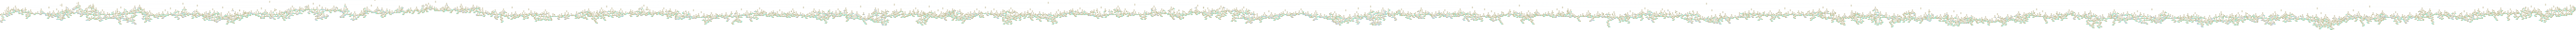

In [26]:
show_in_notebook('surrogate_tree_rental_postpruned.png', width=400, height=400)

In [27]:
y_hat_val2 = surrogate_explainer2.predict(X_val)
print("\n--------Validation/Holdout dataset classification report----------\n")
print(classification_report(y_val, y_hat_val2, target_names=target_names))


--------Validation/Holdout dataset classification report----------

             precision    recall  f1-score   support

    class 0       0.31      0.30      0.31      1152
    class 1       0.78      0.84      0.81     10285
    class 2       0.38      0.30      0.33      3369

avg / total       0.65      0.67      0.66     14806



## Evaluating on supplied test dataset

In [28]:
# using base estimator
X_test = df_test[features_considered]
y_hat_test_base_model = gbm.predict_proba(X_test)
assert X_test.shape[0] == y_hat_test_base_model.shape[0]

y_hat_test_surrogate = surrogate_explainer.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate.shape[0]

y_hat_test_surrogate_pp = surrogate_explainer2.predict(X_test, prob_score=True)
assert X_test.shape[0] == y_hat_test_surrogate_pp.shape[0]

In [30]:
## constructing the format needed for submission
list_id = df_test['listing_id'].tolist()
# base
predictions = pd.DataFrame(y_hat_test_base_model, columns=['high', 'low', 'medium'])
result_df_base = predictions
result_df_base.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_base.index)
# re-arrange the columns
result_df_base = result_df_base[['listing_id', 'high', 'low', 'medium']]

# Surrogate
predictions = pd.DataFrame(y_hat_test_surrogate, columns=['high', 'low', 'medium'])
result_df_surrogate = predictions
result_df_surrogate.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate.index)
# re-arrange the columns
result_df_surrogate = result_df_surrogate[['listing_id', 'high', 'low', 'medium']]

# Surrogate-pp
predictions = pd.DataFrame(y_hat_test_surrogate_pp, columns=['high', 'low', 'medium'])
result_df_surrogate_pp = predictions
result_df_surrogate_pp.loc[:, 'listing_id'] = pd.Series(list_id, index=result_df_surrogate_pp.index)
# re-arrange the columns
result_df_surrogate_pp = result_df_surrogate_pp[['listing_id', 'high', 'low', 'medium']]

In [31]:
# converting to csv
result_df_base.to_csv('submission_base.csv', index=False)
result_df_surrogate.to_csv('submission_surrogate.csv', index=False)
result_df_surrogate_pp.to_csv('submission_spp.csv', index=False)